In [ ]:
import numpy as np
import pandas as pd
import sklearn 
from sklearn.model_selection import train_test_split
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
  

In [ ]:
import matplotlib.pyplot as plt  

In [ ]:
data = pd.read_csv("newLabeled.csv")
data = pd.DataFrame(data)
data.head()

,Best_Bid_Price,FB0,Best_Offer_Price,FA0,FB2,FA2,Next_Best_Bid,Next_Best_Offer,outcome,Curr_Spread,Next_Spread
0,296.240000,2.000000,296.290000,1.000000,-1.000000,0.000000,295.710000,295.780000,-1,0.000000,0.070000
1,295.710000,1.000000,295.780000,2.000000,0.000000,0.000000,295.490000,295.520000,-1,0.000000,0.030000
2,295.490000,3.000000,295.520000,2.000000,0.000000,1.000000,295.680000,295.730000,1,0.000000,0.050000
3,295.680000,1.000000,295.730000,2.000000,-1.000000,0.000000,296.530000,296.600000,1,0.000000,0.070000
4,296.530000,3.000000,296.600000,4.000000,0.000000,1.000000,296.900000,296.930000,1,0.000000,0.030000


In [ ]:
data = data.drop(data.tail(1).index,inplace = False) # NaN value 
data = data.drop(['Next_Best_Bid','Next_Best_Offer','Next_Spread'],axis = 1,inplace = False)
data['Curr_Spread'] = data['Best_Offer_Price'] - data['Best_Bid_Price']
data

,Best_Bid_Price,FB0,Best_Offer_Price,FA0,FB2,FA2,outcome,Curr_Spread
0,296.240000,2.000000,296.290000,1.000000,-1.000000,0.000000,-1,0.050000
1,295.710000,1.000000,295.780000,2.000000,0.000000,0.000000,-1,0.070000
2,295.490000,3.000000,295.520000,2.000000,0.000000,1.000000,1,0.030000
3,295.680000,1.000000,295.730000,2.000000,-1.000000,0.000000,1,0.050000
4,296.530000,3.000000,296.600000,4.000000,0.000000,1.000000,1,0.070000
...,...,...,...,...,...,...,...,...
3211,309.160000,6.000000,309.190000,4.000000,1.000000,0.000000,1,0.030000
3212,309.310000,2.000000,309.320000,1.000000,0.000000,0.000000,1,0.010000
3213,309.450000,2.000000,309.480000,2.000000,0.000000,1.000000,1,0.030000
3214,309.540000,1.000000,309.570000,4.000000,0.000000,0.000000,1,0.030000


In [ ]:
X = data.iloc[:, data.columns != 'outcome']
Y = data['outcome']

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,random_state=104, test_size=0.25, shuffle=True)

In [ ]:
# LOGISTIC REGRESSION 

log_reg = LogisticRegression(solver='newton-cg', multi_class='multinomial')
log_reg.fit(X_train, Y_train)
y_pred = log_reg.predict(X_test)
pd.set_option('float_format', '{:f}'.format)
print('Accuracy: {:.2f}'.format(accuracy_score(Y_test, y_pred)))
print('Error rate: {:.2f}'.format(1 - accuracy_score(Y_test, y_pred)))

Accuracy: 0.51
Error rate: 0.49


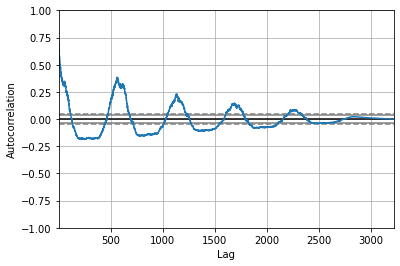

In [ ]:
s = X['Curr_Spread']
x = pd.plotting.autocorrelation_plot(s)
 
# plotting the Curve
x.plot()
 
# Display
plt.show()
# lags = [0,600,1200]

In [ ]:
s = data['Curr_Spread']
s = pd.concat([s, s.shift(250), s.shift(500),s.shift(1250)], axis=1)
s.columns = ['Curr_Spread','Spread_Lag250','Spread_Lag500','Spread_Lag1250']
s['outcome'] = data['outcome']
s = s.dropna()
X2 = s.iloc[:,:-1]
Y2 = s.iloc[:,-1]

In [ ]:
X2_train, X2_test, Y2_train, Y2_test = train_test_split(X2,Y2,random_state=104, test_size=0.25, shuffle=True)

In [ ]:
log_reg = LogisticRegression(solver='newton-cg', multi_class='multinomial')
log_reg.fit(X2_train, Y2_train)
y_pred2 = log_reg.predict(X2_test)
pd.set_option('float_format', '{:f}'.format)
print('Accuracy: {:.2f}'.format(accuracy_score(Y2_test, y_pred2)))
print('Error rate: {:.2f}'.format(1 - accuracy_score(Y2_test, y_pred2)))

Accuracy: 0.50
Error rate: 0.50


In [ ]:
# K-Means
#X_train, X_test, Y_train, Y_test
from sklearn.neighbors import KNeighborsRegressor
# Create the knn model.
# Look at the five closest neighbors.
knn = KNeighborsRegressor(n_neighbors=5)
# Fit the model on the training data.
knn.fit(X_train, Y_train)
# Make point predictions on the test set using the fit model.
predictions = knn.predict(X_test)

In [ ]:

n = len(predictions)

for i in range(n):
  if predictions[i] >= 0.5:
    predictions[i] = 1
  elif predictions[i] <= -0.5:
    predictions[i] = -1
  else:
    predictions[i] = 0

In [ ]:
Y_test = Y_test.tolist()

In [1]:
count = 0
for i in range(n):
  if predictions[i] == Y_test[i]:
    count +=1 

acc = round(count/n,4)
print("Accuracy: " str(acc))
mse = round((((predictions - Y_test) ** 2).sum()) / n,4)
print("MSE: " + str(mse))


SyntaxError: ignored

In [ ]:
# RANDOM FOREST 

from sklearn.ensemble import RandomForestRegressor
  
 # create regressor object
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)
  
# fit the regressor with x and y data
regressor.fit(X_train, Y_train)  

RandomForestRegressor(random_state=0)

In [ ]:
predRF = regressor.predict(X_test)  # test the output by changing values

In [ ]:
for i in range(n):
  if predRF[i] >= 0.5:
    predRF[i] = 1
  elif predRF[i] <= -0.5:
    predRF[i] = -1
  else:
    predRF[i] = 0

In [ ]:
count = 0
for i in range(n):
  if predRF[i] == Y_test[i]:
    count +=1 

acc = round(count/n,4)
print(acc)
mse = round((((predRF - Y_test) ** 2).sum()) / n,4)
print(mse)

0.4154
0.704


In [ ]:
X.describe()

,Best_Bid_Price,FB0,Best_Offer_Price,FA0,FB2,FA2,Curr_Spread
count,3216.000000,3216.000000,3216.000000,3216.000000,3216.000000,3216.000000,3216.000000
mean,300.433803,3.530162,300.480180,4.028607,0.007774,-0.268657,0.046377
std,3.672900,5.468845,3.666171,12.990526,3.741441,11.509356,0.056606
min,292.000000,1.000000,292.050000,1.000000,-73.000000,-367.000000,-0.170000
25%,298.280000,1.000000,298.300000,1.000000,0.000000,0.000000,0.020000
50%,299.300000,2.000000,299.330000,2.000000,0.000000,0.000000,0.030000
75%,301.007500,4.000000,301.080000,4.000000,0.000000,0.000000,0.040000
max,310.320000,105.000000,310.330000,415.000000,72.000000,217.000000,0.600000
